In [40]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt

In [41]:
initPrice = 120 # initial stock price
interest = 0.02 # risk-free interest rate
vol = 0.5 # volatility
strike = 130 # strike price
tfinal = 1/4 # mature time
d = 12 # number of observations
absTol = 0.05 # absolute tolerance of a nickel
relTol = 0 # zero relative tolerance
#sampleSize = 10**6 # number of smaple size
n = 2**17


In [45]:
GeoMeanPut = qp.FinancialOption(
    qp.Lattice(dimension=12,seed=47), #Weekly Monitoring for three months
    option="ASIAN",
    volatility=vol,
    start_price=initPrice,
    strike_price=strike,
    interest_rate=interest,
    t_final=tfinal,
    call_put="put",
    asian_mean='geometric',
    asian_mean_quadrature_rule="RIGHT")
y = GeoMeanPut(n)
print("The exact price of this Geometric Asian Put Option is ",f"{GeoMeanPut.get_exact_value():.4f}")
print("After generate ", n,"lattice points, the price of this Geometric Mean Put Option is ",f"{y.mean():.4f}")

The exact price of this Geometric Asian Put Option is  13.7841
After generate  131072 lattice points, the price of this Geometric Mean Put Option is  13.7841


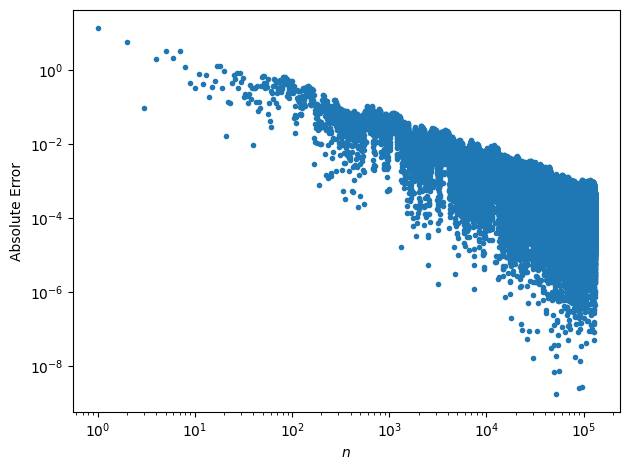

In [43]:
n_vec = np.arange(1, n + 1) 
cumsum_y = np.cumsum(y) 
sample_means = cumsum_y / n_vec 

true_value = GeoMeanPut.get_exact_value()
true_value
error = np.abs(true_value - sample_means)

plt.loglog(n_vec, error, '.', linestyle='none')
#plt.loglog(n_vec, error[0]/n_vec, label=r'$O(n^{-1})$',color='k')
plt.xlabel('$n$')
#plt.legend()
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.show()

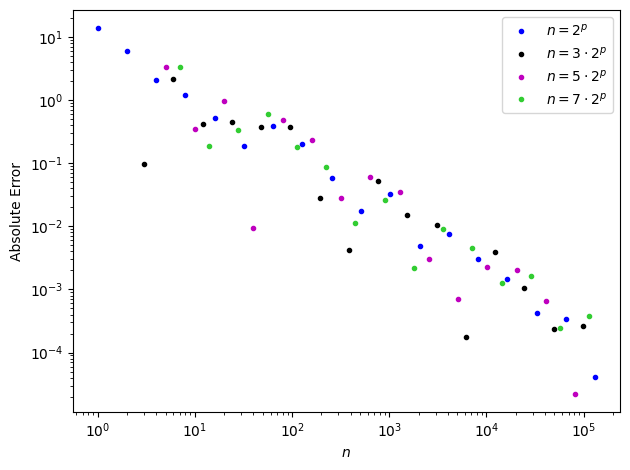

In [44]:
powers_of_two = np.log2(n_vec) % 1 == 0
plt.loglog(n_vec[powers_of_two], error[powers_of_two], '.', label='$n = 2^p$', color='blue')

# n = 3*2^p
lambda_3 = np.log2(n_vec / 3) % 1 == 0
plt.loglog(n_vec[lambda_3], error[lambda_3], '.', label=r'$n = 3 \cdot 2^p$', color='k')

# n = 5*2^p
lambda_5 = np.log2(n_vec / 5) % 1 == 0
plt.loglog(n_vec[lambda_5], error[lambda_5], '.', label=r'$n = 5 \cdot 2^p$', color='m')

# n = 7*2^p
lambda_7 = np.log2(n_vec / 7) % 1 == 0
plt.loglog(n_vec[lambda_7], error[lambda_7], '.', label=r'$n = 7 \cdot 2^p$', color='limegreen')

#plt.loglog(n_vec, error[0]/n_vec, label=r'$O(n^{-1})$',color='k')

plt.xlabel('$n$')
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.legend()
plt.show()

In [49]:
GeoMeanCall = qp.FinancialOption(
    qp.Lattice(dimension=12,seed=77), #Weekly Monitoring for three months
    option="ASIAN",
    volatility=vol,
    start_price=initPrice,
    strike_price=strike,
    interest_rate=interest,
    t_final=tfinal,
    call_put="call",
    asian_mean='geometric',
    asian_mean_quadrature_rule="RIGHT")
y = GeoMeanCall(n)
print("The exact price of this Geometric Asian Put Option is ",f"{GeoMeanCall.get_exact_value():.4f}")
print("After generate ", n,"iid points, the price of this Geometric Mean Call Option is ",f"{y.mean():.4f}")

The exact price of this Geometric Asian Put Option is  3.5401
After generate  131072 iid points, the price of this Geometric Mean Call Option is  3.5399


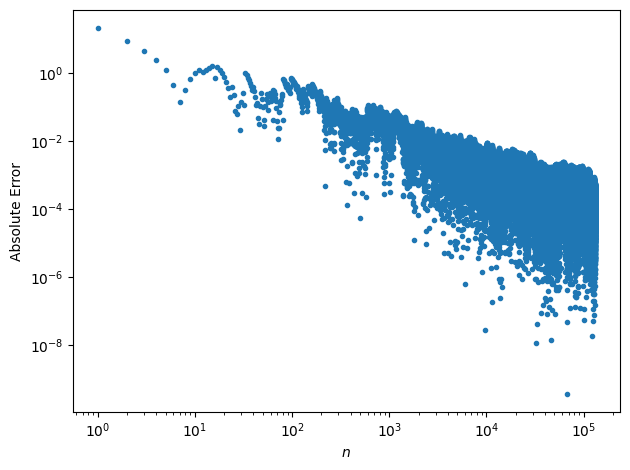

In [51]:
n_vec = np.arange(1, n + 1) 
cumsum_y = np.cumsum(y) 
sample_means = cumsum_y / n_vec 

true_value = GeoMeanCall.get_exact_value()
true_value
error = np.abs(true_value - sample_means)

plt.loglog(n_vec, error, '.', linestyle='none')
#plt.loglog(n_vec, error[0]/n_vec, label=r'$O(n^{-1})$',color='k')
plt.xlabel('$n$')
#plt.legend()
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.show()

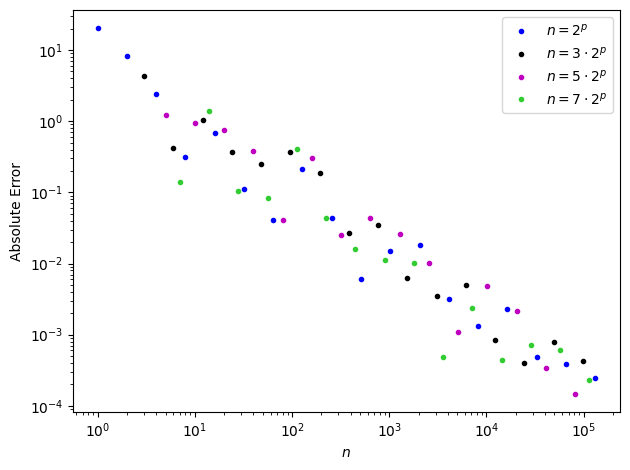

In [52]:
powers_of_two = np.log2(n_vec) % 1 == 0
plt.loglog(n_vec[powers_of_two], error[powers_of_two], '.', label='$n = 2^p$', color='blue')

# n = 3*2^p
lambda_3 = np.log2(n_vec / 3) % 1 == 0
plt.loglog(n_vec[lambda_3], error[lambda_3], '.', label=r'$n = 3 \cdot 2^p$', color='k')

# n = 5*2^p
lambda_5 = np.log2(n_vec / 5) % 1 == 0
plt.loglog(n_vec[lambda_5], error[lambda_5], '.', label=r'$n = 5 \cdot 2^p$', color='m')

# n = 7*2^p
lambda_7 = np.log2(n_vec / 7) % 1 == 0
plt.loglog(n_vec[lambda_7], error[lambda_7], '.', label=r'$n = 7 \cdot 2^p$', color='limegreen')

#plt.loglog(n_vec, error[0]/n_vec, label=r'$O(n^{-1})$',color='k')

plt.xlabel('$n$')
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.legend()
plt.show()